Null, duplicate value remove, Outlier,SMOTE, Feature selection, Applied Model, Hyper parameter,-Ensemble, CV 
ei gula implement korben

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Dataset

In [2]:
df = pd.read_csv("./Diabetes.csv")
df.head(10)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,Sex,Age,Income,Diabetes_binary
0,0,1,0,1,26,0,0,0,1,0,1,0,3,5,1,4,8,0
1,0,1,1,1,26,1,1,0,0,0,1,0,3,0,1,12,8,0
2,0,0,0,1,26,0,0,0,1,0,1,0,1,0,1,13,8,0
3,0,1,1,1,28,1,0,0,1,0,1,0,3,0,1,11,8,0
4,0,0,0,1,29,1,0,0,1,0,1,0,2,0,0,8,8,0
5,0,0,0,1,18,0,0,0,1,0,0,0,2,7,0,1,7,0
6,0,0,1,1,26,1,0,0,1,1,1,0,1,0,1,13,6,0
7,0,0,0,1,31,1,0,0,0,0,1,0,4,0,1,6,3,0
8,0,0,0,1,32,0,0,0,1,0,1,0,3,0,0,3,8,0
9,0,0,0,1,27,1,0,0,0,0,1,0,3,0,1,6,4,0


In [3]:
df.tail(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,Sex,Age,Income,Diabetes_binary
249990,0,1,1,1,37,0,0,0,1,0,1,0,5,28,0,9,8,0
249991,2,0,1,1,30,1,0,0,1,0,1,0,2,0,0,9,8,0
249992,0,1,0,1,26,1,0,0,1,0,1,0,3,0,0,11,5,0
249993,0,1,1,1,30,1,0,0,1,0,1,0,3,0,1,10,8,0
249994,0,1,1,1,29,1,0,0,0,0,1,0,4,5,1,10,3,0
249995,0,1,0,1,21,0,0,0,1,0,1,0,2,0,0,9,6,0
249996,0,0,1,1,29,0,0,0,1,0,1,0,5,0,0,10,1,0
249997,0,1,0,1,28,1,0,1,1,0,1,0,2,2,0,9,8,0
249998,0,1,1,1,32,0,0,0,0,0,1,0,3,0,1,8,7,1
249999,0,1,0,1,35,1,0,0,0,0,1,0,2,0,0,13,6,1


# Dataset info

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          250000 non-null  int64
 1   HighBP                250000 non-null  int64
 2   HighChol              250000 non-null  int64
 3   CholCheck             250000 non-null  int64
 4   BMI                   250000 non-null  int64
 5   Smoker                250000 non-null  int64
 6   Stroke                250000 non-null  int64
 7   HeartDiseaseorAttack  250000 non-null  int64
 8   PhysActivity          250000 non-null  int64
 9   HvyAlcoholConsump     250000 non-null  int64
 10  AnyHealthcare         250000 non-null  int64
 11  NoDocbcCost           250000 non-null  int64
 12  GenHlth               250000 non-null  int64
 13  MentHlth              250000 non-null  int64
 14  Sex                   250000 non-null  int64
 15  Age                   250000 non-n

# Null check

In [5]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
Sex                     0
Age                     0
Income                  0
Diabetes_binary         0
dtype: int64

In [ ]:
# if null existed
df.fillna(df.mean(), inplace=True)

# replace duplicate

In [6]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify if duplicates a
# re removed
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 168899


# Imports

In [8]:
from sklearn.model_selection import train_test_split as split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Split Dataset

In [9]:
x = df.drop("Diabetes_binary", axis=1)
y = df.Diabetes_binary

x_train, x_test, y_train, y_test = split(x, y, test_size=0.20, random_state=1)

print(f"Original data has total {x_train.shape[0]+x_test.shape[0]} datas, {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")


Original data has total 168899 datas, 135119 train data and 33780 test data



# Models

In [10]:
# Decision tree
rf_decision_tree = DecisionTreeClassifier(random_state=50)
rf_decision_tree.fit(x_train, y_train)
y_pred = rf_decision_tree.predict(x_test)
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred)*100}%")


# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_random_forest = RandomForestClassifier(random_state=50)
rf_random_forest.fit(x_train, y_train)
y_pred = rf_random_forest.predict(x_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred)*100}%")



Decision Tree Test Accuracy: 70.85849615156897%
Random Forest Test Accuracy: 76.09828300769686%


# outlier

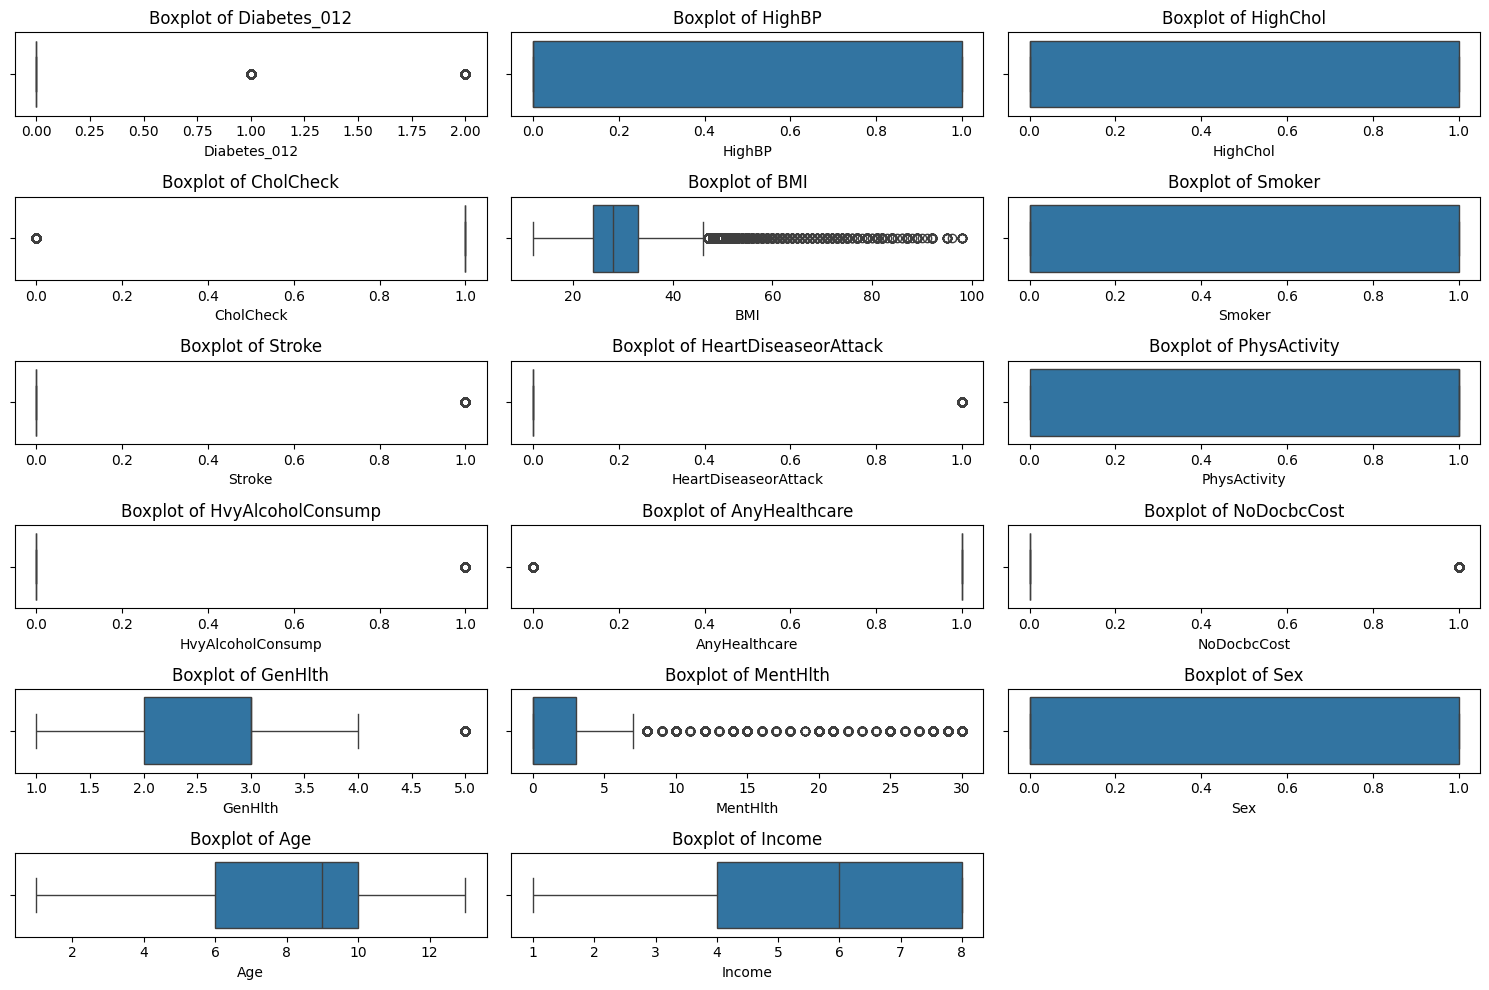

In [11]:

# Create boxplots for each feature
plt.figure(figsize=(15, 10))

# Loop through each column in the dataset except the target variable
for i, col in enumerate(x.columns, 1):
    plt.subplot(len(x.columns) // 3 + 1, 3, i)  
    sns.boxplot(x=x[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# outlier col

In [12]:

# Define a function to detect outliers using the IQR method
def detect_outliers(df):
    outlier_columns = []
    for col in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if there are any outliers in the column
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)

    return outlier_columns

# Detect which columns in X have outliers
columns_with_outliers = detect_outliers(x)

print("Columns with outliers:", columns_with_outliers)



Columns with outliers: ['Diabetes_012', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth']


# outliers count

In [13]:

# Function to count outliers using IQR
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers in the column
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

    # Convert the dictionary to a pandas DataFrame for better visualization
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    return outlier_counts_df.sort_values(by='Outlier Count', ascending=False)

# Get the outlier counts for each column
outlier_counts_df = count_outliers(x)

# Display the columns with the most outliers
print(outlier_counts_df)

                  Column  Outlier Count
0           Diabetes_012          34798
13              MentHlth          27487
7   HeartDiseaseorAttack          21016
11           NoDocbcCost          17909
12               GenHlth          11280
9      HvyAlcoholConsump          10881
10         AnyHealthcare          10084
6                 Stroke           9326
3              CholCheck           7113
4                    BMI           3827
15                   Age              0
14                   Sex              0
8           PhysActivity              0
1                 HighBP              0
5                 Smoker              0
2               HighChol              0
16                Income              0


# Cap outliers

In [14]:
# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Cap outliers in X
x = cap_outliers(x, columns_with_outliers)


# Outlier after capping

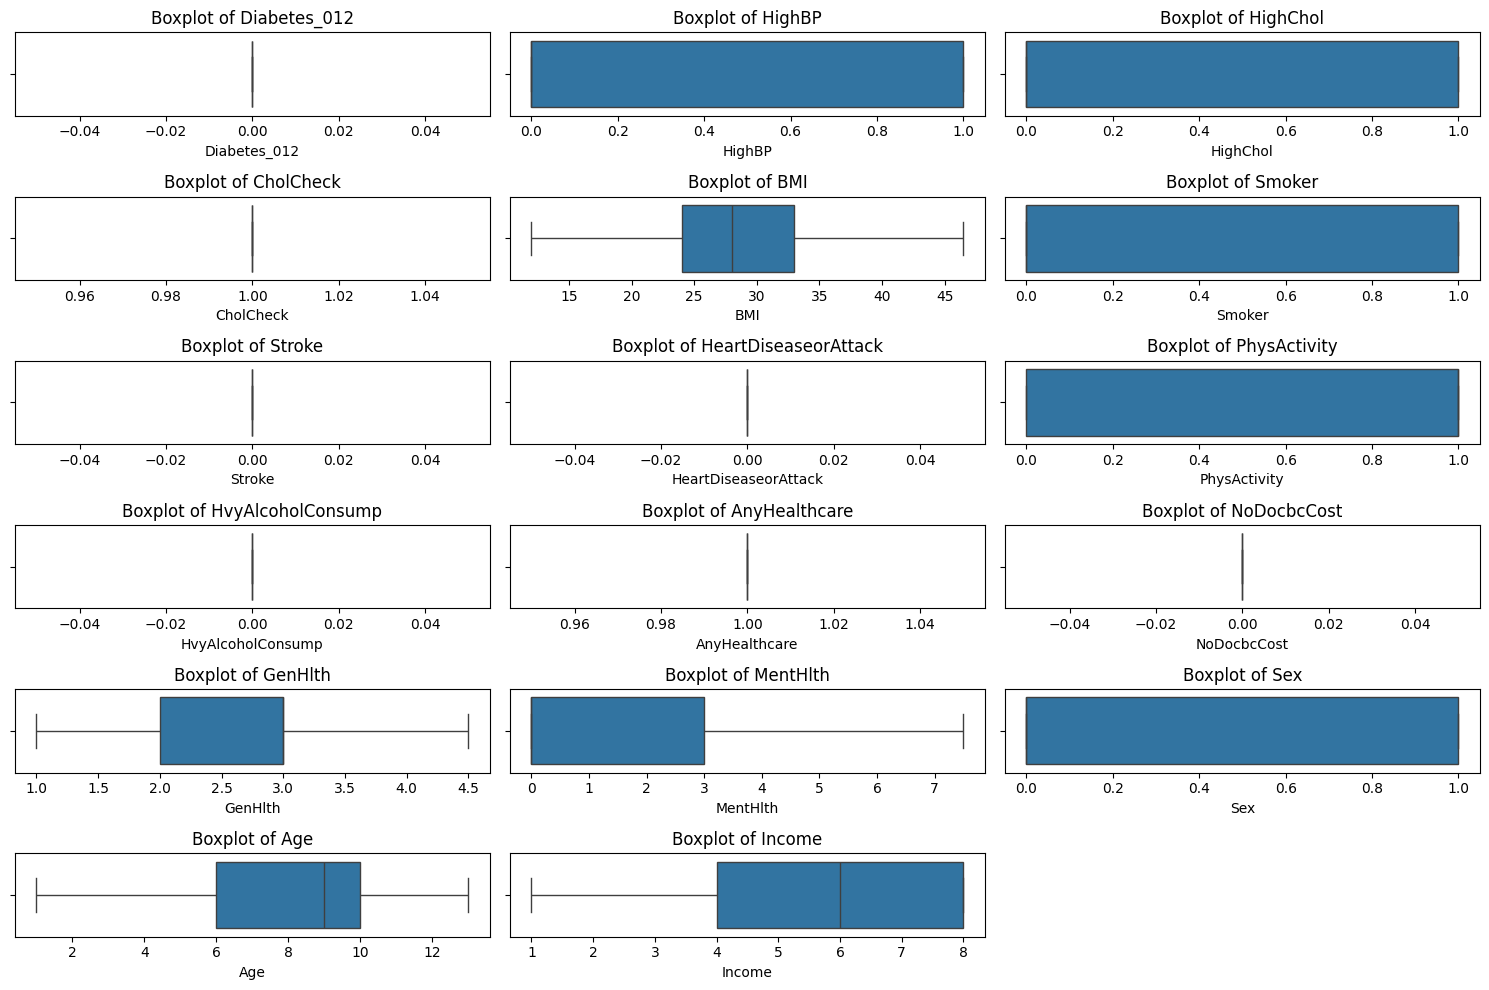

In [15]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Create boxplots for each feature
plt.figure(figsize=(15, 10))

# Loop through each column in the dataset except the target variable
for i, col in enumerate(x.columns, 1):
    plt.subplot(len(x.columns) // 3 + 1, 3, i)  # Create subplots dynamically
    sns.boxplot(x=x[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Smote

In [16]:
#default
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


In [9]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampler to the training data
ros = RandomOverSampler(random_state=1)
x_train_smote, y_train_smote = ros.fit_resample(x_train, y_train)


In [28]:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek to the training data
smote_tomek = SMOTETomek(random_state=1)
x_train_smote, y_train_smote = smote_tomek.fit_resample(x_train, y_train)


In [29]:
# Apply ADASYN to the training data
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=1)
x_train_smote, y_train_smote = adasyn.fit_resample(x_train, y_train)

# After Smote Charts

C:\Users\user\AppData\Local\Temp\ipykernel_1364\825302514.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smote_class_order, y=smote_class_counts, palette=class_colors, ax=ax[1])


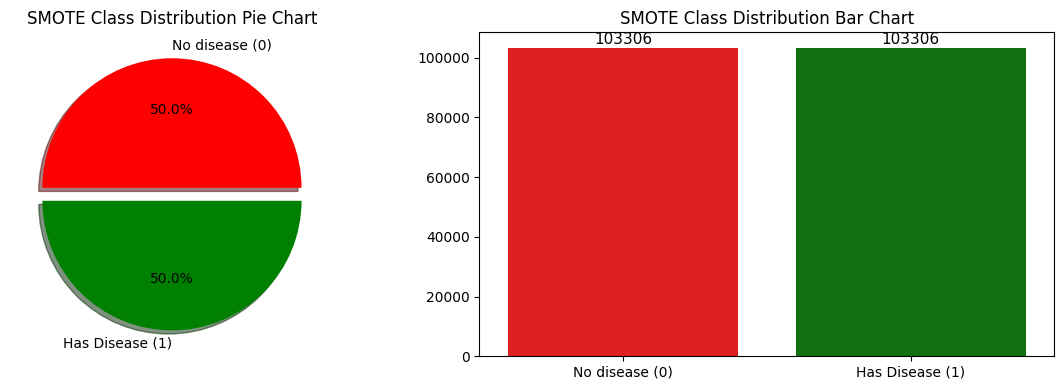

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train and y_train are defined and contain the original data

# Step 1: Apply SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Get the distribution of the resampled data
smote_counts = Counter(y_train_smote)

# Prepare class data after SMOTE
smote_class_counts = list(smote_counts.values())
smote_class_order = ["No disease (0)", "Has Disease (1)"]
class_colors = ['red', 'green']  # Colors for the pie chart and bar plot

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart for SMOTE-applied Class distribution
ax[0].pie(smote_class_counts,
          labels=smote_class_order, 
          colors=class_colors, 
          explode=[0.05, 0.05], 
          autopct='%1.1f%%', 
          shadow=True)
ax[0].set_title("SMOTE Class Distribution Pie Chart")
ax[0].set_ylabel('')

# Bar chart for SMOTE-applied Class distribution
sns.barplot(x=smote_class_order, y=smote_class_counts, palette=class_colors, ax=ax[1])

for i, bar in enumerate(ax[1].patches):
    ax[1].annotate(f'{smote_class_counts[i]}', 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center', 
                   size=11, xytext=(0, 6), 
                   textcoords='offset points')

ax[1].set_title("SMOTE Class Distribution Bar Chart")

# Show the plot
plt.tight_layout()
plt.show()


# Feature selection

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Function to perform feature selection and evaluate models
def feature_selection_evaluation(k, x_train, y_train, x_test, y_test):
    print(f"\nFeature Selection with Top {k} Features:")

    # Remove constant features
    variance_filter = VarianceThreshold(threshold=0.0)
    x_train_var = variance_filter.fit_transform(x_train)
    x_test_var = variance_filter.transform(x_test)
    
    # ANOVA feature selection
    anova_selector = SelectKBest(score_func=f_classif, k=k)
    X_train_anova = anova_selector.fit_transform(x_train_var, y_train)
    X_test_anova = anova_selector.transform(x_test_var)

    # Chi-Square feature selection
    chi2_selector = SelectKBest(score_func=chi2, k=k)
    X_train_chi2 = chi2_selector.fit_transform(x_train_var, y_train)
    X_test_chi2 = chi2_selector.transform(x_test_var)

    # RFE feature selection using Logistic Regression
    rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000, random_state=1), n_features_to_select=k)
    X_train_rfe = rfe_selector.fit_transform(x_train_var, y_train)
    X_test_rfe = rfe_selector.transform(x_test_var)

    # Function to train and evaluate models on feature-selected datasets
    def train_evaluate_smote(X_train_fs, y_train_fs, X_test_fs, y_test, model_name):
        print(f"\nEvaluating {model_name} feature selection:")

        # Train and evaluate Random Forest
        rf_model = RandomForestClassifier(random_state=1)
        rf_model.fit(X_train_fs, y_train_fs)
        y_pred_rf = rf_model.predict(X_test_fs)
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        print(f"{model_name} - Random Forest Accuracy: {accuracy_rf:.2%}")

        # Train and evaluate Decision Tree
        dt_model = DecisionTreeClassifier(random_state=1)
        dt_model.fit(X_train_fs, y_train_fs)
        y_pred_dt = dt_model.predict(X_test_fs)
        accuracy_dt = accuracy_score(y_test, y_pred_dt)
        print(f"{model_name} - Decision Tree Accuracy: {accuracy_dt:.2%}")

    # Evaluate models on feature-selected datasets
    train_evaluate_smote(X_train_anova, y_train, X_test_anova, y_test, "ANOVA")
    train_evaluate_smote(X_train_chi2, y_train, X_test_chi2, y_test, "Chi-Square")
    train_evaluate_smote(X_train_rfe, y_train, X_test_rfe, y_test, "RFE")

# Call the function for k=10 and k=5
feature_selection_evaluation(10, x_train_smote, y_train_smote, x_test, y_test)
feature_selection_evaluation(5, x_train_smote, y_train_smote, x_test, y_test)



Feature Selection with Top 10 Features:

Evaluating ANOVA feature selection:
ANOVA - Random Forest Accuracy: 75.00%
ANOVA - Decision Tree Accuracy: 72.45%

Evaluating Chi-Square feature selection:
Chi-Square - Random Forest Accuracy: 75.00%
Chi-Square - Decision Tree Accuracy: 72.45%

Evaluating RFE feature selection:
RFE - Random Forest Accuracy: 75.00%
RFE - Decision Tree Accuracy: 72.45%

Feature Selection with Top 5 Features:

Evaluating ANOVA feature selection:
ANOVA - Random Forest Accuracy: 73.42%
ANOVA - Decision Tree Accuracy: 73.68%

Evaluating Chi-Square feature selection:
Chi-Square - Random Forest Accuracy: 72.31%
Chi-Square - Decision Tree Accuracy: 72.42%

Evaluating RFE feature selection:
RFE - Random Forest Accuracy: 70.90%
RFE - Decision Tree Accuracy: 70.90%


# updated feature code

# Hyper parameter

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Function to perform feature selection and evaluate models
def feature_selection_evaluation(k, x_train, y_train, x_test, y_test):
    print(f"\nFeature Selection with Top {k} Features:")

    # Remove constant features
    variance_filter = VarianceThreshold(threshold=0.0)
    x_train_var = variance_filter.fit_transform(x_train)
    x_test_var = variance_filter.transform(x_test)
    
    # ANOVA feature selection
    anova_selector = SelectKBest(score_func=f_classif, k=k)
    X_train_anova = anova_selector.fit_transform(x_train_var, y_train)
    X_test_anova = anova_selector.transform(x_test_var)



    # Function to train and evaluate models on feature-selected datasets
    def train_evaluate_smote(X_train_fs, y_train_fs, X_test_fs, y_test, model_name):
        print(f"\nEvaluating {model_name} feature selection:")

        # Train and evaluate Random Forest
        rf_model = RandomForestClassifier(random_state=1)
        rf_model.fit(X_train_fs, y_train_fs)
        y_pred_rf = rf_model.predict(X_test_fs)
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        print(f"{model_name} - Random Forest Accuracy: {accuracy_rf:.2%}")

        # Hyperparameter tuning for Random Forest
        param_grid_rf = {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search_rf.fit(X_train_fs, y_train_fs)
        print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
        print(f"Best Accuracy for Random Forest: {grid_search_rf.best_score_:.2%}")

        # Train and evaluate Decision Tree
        dt_model = DecisionTreeClassifier(random_state=1)
        dt_model.fit(X_train_fs, y_train_fs)
        y_pred_dt = dt_model.predict(X_test_fs)
        accuracy_dt = accuracy_score(y_test, y_pred_dt)
        print(f"{model_name} - Decision Tree Accuracy: {accuracy_dt:.2%}")

        # Hyperparameter tuning for Decision Tree
        param_grid_dt = {
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search_dt.fit(X_train_fs, y_train_fs)
        print(f"Best Parameters for Decision Tree: {grid_search_dt.best_params_}")
        print(f"Best Accuracy for Decision Tree: {grid_search_dt.best_score_:.2%}")

    # Evaluate models on feature-selected datasets
    train_evaluate_smote(X_train_anova, y_train, X_test_anova, y_test, "ANOVA")
    # train_evaluate_smote(X_train_chi2, y_train, X_test_chi2, y_test, "Chi-Square")

# Call the function for k=10 and k=5
feature_selection_evaluation(10, x_train_smote, y_train_smote, x_test, y_test)
# feature_selection_evaluation(5, x_train_smote, y_train_smote, x_test, y_test)



Feature Selection with Top 10 Features:

Evaluating ANOVA feature selection:
ANOVA - Random Forest Accuracy: 75.00%
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy for Random Forest: 83.16%
ANOVA - Decision Tree Accuracy: 72.45%
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy for Decision Tree: 80.32%


# ensemble

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create individual models
dt_model = DecisionTreeClassifier(random_state=1)
rf_model = RandomForestClassifier(random_state=1)

# Combine the models in a voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', dt_model),
    ('random_forest', rf_model),
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(x_train, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_model.predict(x_test)

# Evaluate the ensemble model
print("\nEnsemble Model (Voting Classifier):")
print(classification_report(y_test, y_pred_ensemble))
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))



Ensemble Model (Voting Classifier):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     25923
           1       0.44      0.45      0.45      7857

    accuracy                           0.74     33780
   macro avg       0.64      0.64      0.64     33780
weighted avg       0.74      0.74      0.74     33780

Accuracy: 0.7407341622261693


# Cross validation

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Create models for evaluation
rf_model = RandomForestClassifier(random_state=1)
dt_model = DecisionTreeClassifier(random_state=1)

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, x_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.2%} ± {rf_cv_scores.std():.2%}")

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model, x_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f"Decision Tree Cross-Validation Accuracy: {dt_cv_scores.mean():.2%} ± {dt_cv_scores.std():.2%}")


# Final Evaluation on the Test Set (after applying cross-validation)
# Random Forest
rf_model.fit(x_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.2%}")

# Decision Tree
dt_model.fit(x_train_smote, y_train_smote)
y_pred_dt = dt_model.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test Accuracy: {accuracy_dt:.2%}")


Random Forest Cross-Validation Accuracy: 83.81% ± 3.51%
Decision Tree Cross-Validation Accuracy: 81.15% ± 4.44%
Random Forest Test Accuracy: 75.19%
Decision Tree Test Accuracy: 72.74%


# Accuracy report

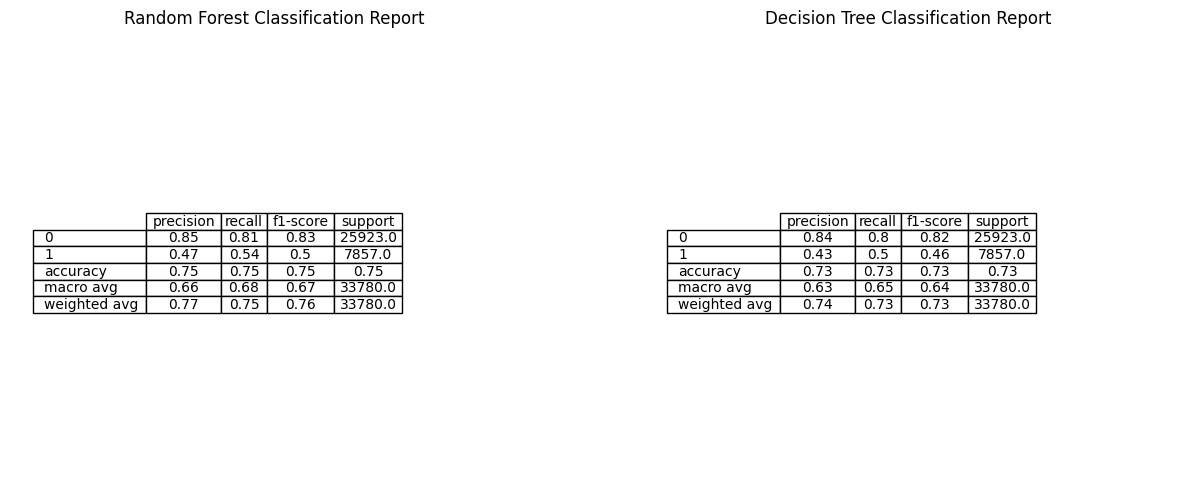

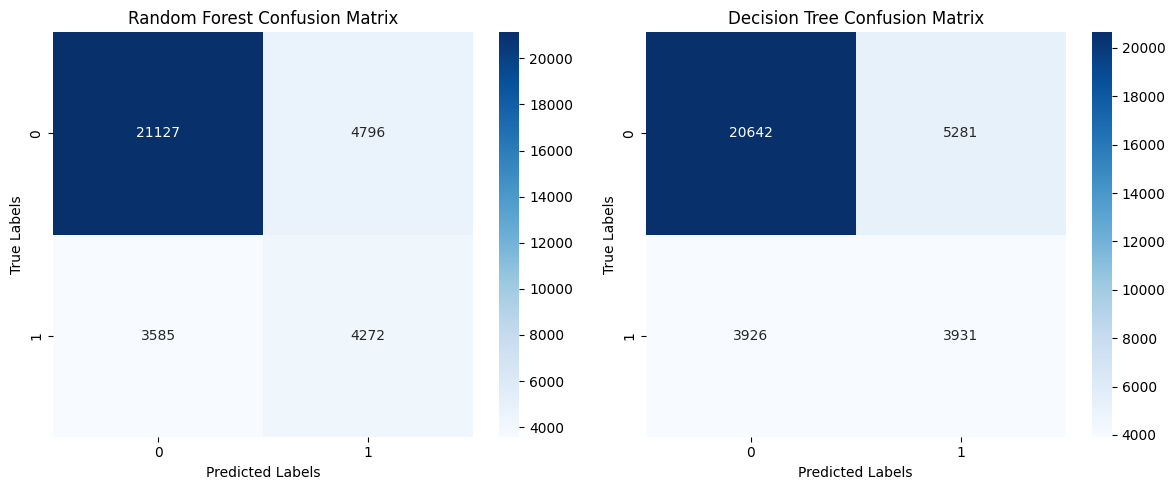

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Create models for evaluation
rf_model = RandomForestClassifier(random_state=1)
dt_model = DecisionTreeClassifier(random_state=1)

# Fit and predict with Random Forest
rf_model.fit(x_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(x_test)

# Fit and predict with Decision Tree
dt_model.fit(x_train_smote, y_train_smote)
y_pred_dt = dt_model.predict(x_test)

# Generate classification reports
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Convert the classification reports to DataFrames for easier display
df_rf = pd.DataFrame(report_rf).transpose()
df_dt = pd.DataFrame(report_dt).transpose()

# Plotting the classification report tables
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].axis('tight')
axes[0].axis('off')
axes[1].axis('tight')
axes[1].axis('off')

# Random Forest report table
table_rf = axes[0].table(cellText=df_rf.round(2).values, colLabels=df_rf.columns, rowLabels=df_rf.index, cellLoc='center', loc='center')
table_rf.auto_set_font_size(False)
table_rf.set_fontsize(10)
table_rf.auto_set_column_width(col=list(range(len(df_rf.columns))))
axes[0].set_title("Random Forest Classification Report")

# Decision Tree report table
table_dt = axes[1].table(cellText=df_dt.round(2).values, colLabels=df_dt.columns, rowLabels=df_dt.index, cellLoc='center', loc='center')
table_dt.auto_set_font_size(False)
table_dt.set_fontsize(10)
table_dt.auto_set_column_width(col=list(range(len(df_dt.columns))))
axes[1].set_title("Decision Tree Classification Report")

plt.show()

# Plotting the confusion matrices for each model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()


# Save model

In [123]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Save the trained model
joblib.dump(rf_model, "random_forest_model.pkl")


['random_forest_model.pkl']

# Comparison 

In [9]:
import pandas as pd

# Create the accuracy data for different models and phases
accuracy_data = {
    'Phase': ['Default', 'After SMOTE', 'After Ensemble'],
    'Decision Tree': [95.0, 100.0, None],  # Ensemble not applicable to Decision Tree
    'Random Forest': [100.0, 100.0, None], # Ensemble not applicable to Random Forest
    'SVM': [58.75, 66.25, None],           # SVM not included in ensemble phase
    'Ensemble': [None, None, 55.0]          # Ensemble phase accuracy
}

# Create a dataframe to store the accuracy values
accuracy_df = pd.DataFrame(accuracy_data)

# Beautify the table with larger cells and text, and format the numbers to 1 decimal place
styled_df = (accuracy_df.style
             .set_properties(**{
                 'background-color': '#f2f2f2',
                 'color': 'black',
                 'border-color': 'black',
                 'text-align': 'center',
                 'font-size': '26px',  # Increase font size
                 'padding': '50px'     # Increase padding for larger cells
             })
             .set_table_styles([
                 {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('text-align', 'center'), ('font-size', '18px'), ('padding', '12px')]},  # Larger header
                 {'selector': 'th', 'props': [('text-align', 'center')]}
             ])
             .set_caption("Model Accuracy Comparison Across Phases")
             .format(precision=1))  # Format to one decimal place

styled_df


,Phase,Decision Tree,Random Forest,SVM,Ensemble
0,Default,95.0,100.0,58.8,nan
1,After SMOTE,100.0,100.0,66.2,nan
2,After Ensemble,nan,nan,nan,55.0
